<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
import matplotlib.pyplot as plt


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Task 1: Become familiar with the dataset

In [22]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [23]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Task 2 
- For the "Median value of owner-occupied homes" provide a boxplot

- Observation: The median value is around 20000$ with outliers toward the higher proce bracket.
  

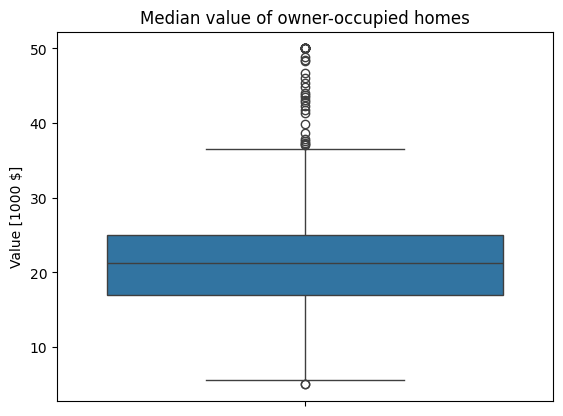

In [30]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(title="Median value of owner-occupied homes",ylabel = 'Value [1000 $]')

plt.show()

- Provide a  bar plot for the Charles river variable
- observation: Most of the land does not bound the Charles River

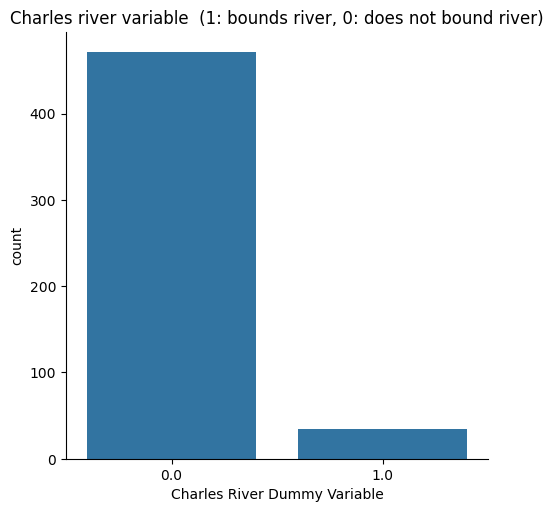

In [38]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(title="Charles river variable  (1: bounds river, 0: does not bound river)", xlabel = 'Charles River Dummy Variable')

plt.show()

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- -observation : on average the prices are lower as the houses get older

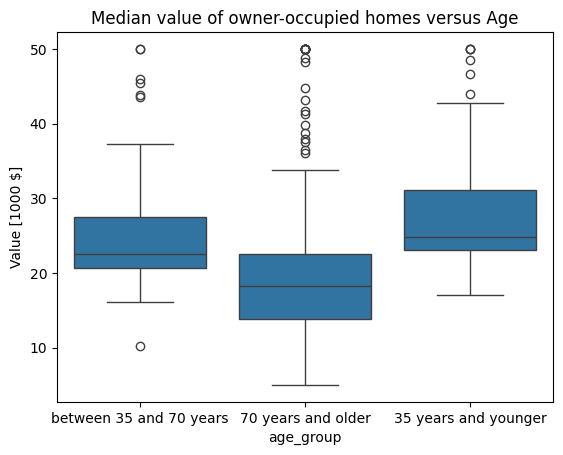

In [42]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(y='MEDV',x = 'age_group', data=boston_df)
ax.set(title="Median value of owner-occupied homes versus Age",ylabel = 'Value [1000 $]')

plt.show()

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Observation: As the proportion of non-retail business increases, so does the nitric oxide concentration. 

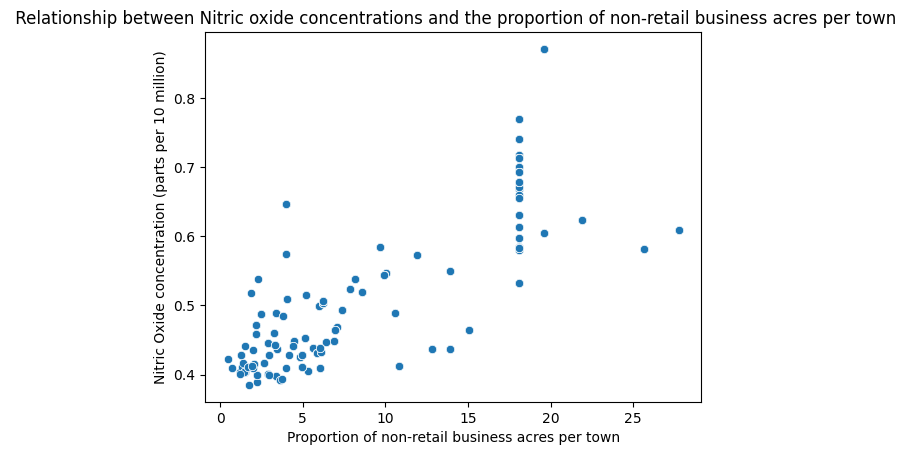

In [46]:
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set(title = ' Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town', ylabel = 'Nitric Oxide concentration (parts per 10 million)', xlabel = 'Proportion of non-retail business acres per town')
plt.show()

- Create a histogram for the pupil to teacher ratio variable
- pupil-teacher ratio is a skewed dist with higher ratio having a higher 

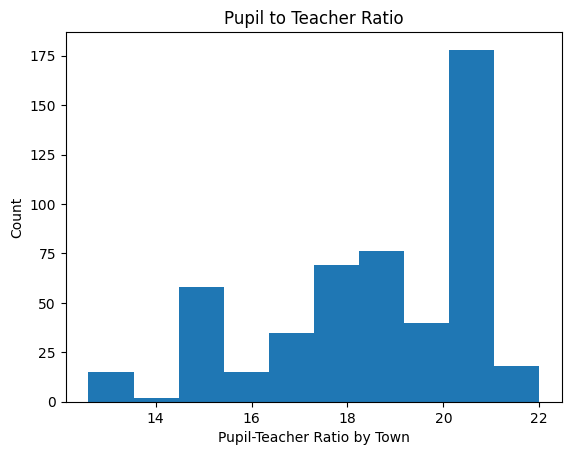

In [54]:
plt.hist(x='PTRATIO', data=boston_df)
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.title("Pupil to Teacher Ratio")
plt.ylabel('Count')
plt.show()

### Task 3:

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

α = 0.05

Since the p-value is <0.05, we reject the null hypothesis!

In [58]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] ==1]['MEDV'],
                   boston_df[boston_df['CHAS'] ==0]['MEDV'])


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3 $ ("there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940")
*   $H\_1$: "there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940"

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

In [59]:
A = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
B = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
C = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(A, B, C)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ No correlation between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ Correlation between Nitric oxide concentrations and proportion of non-retail business acres per town


Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [61]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

   State the hypothesis:

*   $H\_0$:No impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
*   $H\_1$: Impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis. The shorter the weighted distance the more likely the value of the house is lower

In [62]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        18:14:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""